# **TUGAS PRAKTIKUM**


- Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
model_cifar = models.Sequential()

# --- Data Augmentation (sedikit berbeda) ---
model_cifar.add(layers.Input(shape=(32, 32, 3)))
model_cifar.add(layers.RandomFlip("horizontal"))
model_cifar.add(layers.RandomRotation(0.1))
model_cifar.add(layers.RandomZoom(0.1))
model_cifar.add(layers.RandomContrast(0.2))

# --- Block 1 ---
model_cifar.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model_cifar.add(layers.BatchNormalization())
model_cifar.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model_cifar.add(layers.BatchNormalization())
model_cifar.add(layers.MaxPooling2D())
model_cifar.add(layers.Dropout(0.2))

# --- Block 2 ---
model_cifar.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model_cifar.add(layers.BatchNormalization())
model_cifar.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model_cifar.add(layers.BatchNormalization())
model_cifar.add(layers.MaxPooling2D())
model_cifar.add(layers.Dropout(0.3))

# --- Block 3 ---
model_cifar.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
model_cifar.add(layers.BatchNormalization())
model_cifar.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
model_cifar.add(layers.BatchNormalization())
model_cifar.add(layers.MaxPooling2D())
model_cifar.add(layers.Dropout(0.4))

# --- Dense Layer ---
model_cifar.add(layers.GlobalAveragePooling2D())   # berbeda dari Flatten
model_cifar.add(layers.Dense(128, activation='relu'))
model_cifar.add(layers.BatchNormalization())
model_cifar.add(layers.Dropout(0.5))

# Output
model_cifar.add(layers.Dense(10))

model_cifar.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast                 │ (None, 32, 32, 3)      │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             

 Total params: 307,114 (1.17 MB)

 Trainable params: 305,962 (1.17 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [ ]:
model_cifar.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model_cifar.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 524s 331ms/step - accuracy: 0.2890 - loss: 2.1242 - val_accuracy: 0.4773 - val_loss: 1.5055
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 515s 330ms/step - accuracy: 0.4943 - loss: 1.3982 - val_accuracy: 0.4876 - val_loss: 1.6375
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 512s 328ms/step - accuracy: 0.5629 - loss: 1.2329 - val_accuracy: 0.5701 - val_loss: 1.2792
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 580s 339ms/step - accuracy: 0.6094 - loss: 1.1178 - val_accuracy: 0.6131 - val_loss: 1.1476
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 541s 326ms/step - accuracy: 0.6431 - loss: 1.0300 - val_accuracy: 0.6811 - val_loss: 0.9048
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 583s 339ms/step - accuracy: 0.6650 - loss: 0.9747 - val_accuracy: 0.6640 - val_loss: 1.0101
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 543s 327ms/step - accuracy: 0.6805 - loss: 0.9336 - val_accuracy: 0.7241 - val_loss: 0.8143
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 514s 329ms/step - ac

313/313 - 22s - 70ms/step - accuracy: 0.8103 - loss: 0.5600


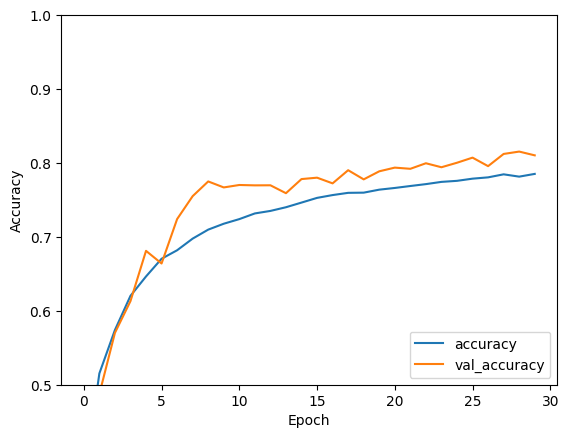

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_cifar.evaluate(test_images, test_labels, verbose=2)

In [ ]:
print(f"\nAccuracy CIFAR-10: {test_acc*100:.2f}%")


Accuracy CIFAR-10: 81.03%


- Buatlah model CNN untuk klasifikasi dataset MNIST.

In [ ]:
# Load dataset MNIST
(train_images_mnist, train_labels_mnist), (test_images_mnist, test_labels_mnist) = datasets.mnist.load_data()

# Normalize pixel values (0-1)
train_images_mnist, test_images_mnist = train_images_mnist / 255.0, test_images_mnist / 255.0

# Reshape data
train_images_mnist = train_images_mnist.reshape((60000, 28, 28, 1))
test_images_mnist = test_images_mnist.reshape((10000, 28, 28, 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model_mnist = models.Sequential()

# Layer Konvolusi 1
model_mnist.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_mnist.add(layers.MaxPooling2D((2, 2)))

# Layer Konvolusi 2
model_mnist.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_mnist.add(layers.MaxPooling2D((2, 2)))

# Layer Konvolusi 3
model_mnist.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten & Dense
model_mnist.add(layers.Flatten())
model_mnist.add(layers.Dense(64, activation='relu'))
model_mnist.add(layers.Dense(10))

model_mnist.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_mnist.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history_mnist = model_mnist.fit(train_images_mnist, train_labels_mnist, epochs=5, validation_data=(test_images_mnist, test_labels_mnist))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.8913 - loss: 0.3513 - val_accuracy: 0.9824 - val_loss: 0.0516
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9837 - loss: 0.0495 - val_accuracy: 0.9885 - val_loss: 0.0379
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9896 - loss: 0.0338 - val_accuracy: 0.9892 - val_loss: 0.0362
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9918 - loss: 0.0254 - val_accuracy: 0.9901 - val_loss: 0.0301
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9934 - loss: 0.0198 - val_accuracy: 0.9854 - val_loss: 0.0468


In [ ]:
test_loss, test_acc_mnist = model_mnist.evaluate(test_images_mnist, test_labels_mnist, verbose=2)
print(f"\nAccuracy MNIST: {test_acc_mnist*100:.2f}%")

313/313 - 3s - 9ms/step - accuracy: 0.9854 - loss: 0.0468

Accuracy MNIST: 98.54%
